In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT LIBRARIES**

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**READING CSV FILE**

In [3]:
data = pd.read_csv('drive/MyDrive/Airports2.csv')

# Display the data
print(data.columns)

Index(['Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')


**GRAPH CREATION**

In [100]:
import networkx as nx
df = data.copy()

# Step 2: Initialize a directed graph
G = nx.DiGraph()
i=0
# Step 3: Add nodes and edges from the DataFrame
for _, row in df.iterrows():

    # Add Origin and Destination airports as nodes
    G.add_node(
        row['Origin_city'],



    )
    '''  origin_city=row['Origin_city'],
        origin_airport=row['Origin_airport'],
        population=row['Origin_population'],
        latitude=row['Org_airport_lat'],
        longitude=row['Org_airport_long'] '''
    G.add_node(
        row['Destination_city'],



    )
    '''   destination_airport=row['Destination_airport'],
        destination_city=row['Destination_city'],
        population=row['Destination_population'],
        latitude=row['Dest_airport_lat'],
        longitude=row['Dest_airport_long'] '''

    # Add the flight information as an edge between Origin and Destination
    G.add_edge(
        row['Origin_city'],

        row['Destination_city'],
        distance=row['Distance'],


    )

    ''' fly_date=row['Fly_date'],
        passengers=row['Passengers'],
        seats=row['Seats'],
        flights=row['Flights'], '''
    '''  '''



''' # Step 4: Print the graph's nodes and edges to verify
print("Nodes and their attributes:")
for node, attributes in G.nodes(data=True):
    print(node, attributes)

print("\nEdges and their attributes:")
for u, v, attributes in G.edges(data=True):
    print(f"{u} -> {v}:", attributes) '''

' # Step 4: Print the graph\'s nodes and edges to verify\nprint("Nodes and their attributes:")\nfor node, attributes in G.nodes(data=True):\n    print(node, attributes)\n\nprint("\nEdges and their attributes:")\nfor u, v, attributes in G.edges(data=True):\n    print(f"{u} -> {v}:", attributes) '

**LOUVAIN ALGORITHM IMPLEMENTATION**

In [101]:
def compute_modularity(graph, partition):
    """
    Calculate modularity of the graph for a given partition.

    Parameters:
    - graph: NetworkX graph
    - partition: Dictionary of node to community mappings

    Returns:
    - Modularity score
    """
    m = graph.size(weight="distance")  # Total edge weight
    degrees = {node: sum(data["distance"] for _, _, data in graph.edges(node, data=True)) for node in graph.nodes()}

    modularity = 0
    for community in set(partition.values()):
        community_nodes = [node for node, comm in partition.items() if comm == community]
        internal_edges = graph.subgraph(community_nodes).size(weight="weight")
        degree_sum = sum(degrees[node] for node in community_nodes)
        modularity += (internal_edges / m) - (degree_sum / (2 * m))**2

    return modularity

def louvain_method_check(graph):
    """
    Louvain method for community detection.

    Parameters:
    - graph: NetworkX graph object

    Returns:
    - Dictionary mapping each node to its community
    """
    # Step 1: Initialize each node in its own community
    partition = {node: node for node in graph.nodes()}
    modularity = compute_modularity(graph, partition)
    previous_modularity=modularity
    max_modularity=modularity
    starter=0
    checker=0
    print(f"Initial modularity: {modularity:.4f}")
    earlier_partition=partition
    # Step 2: Iteratively improve the partition
    while True:
        moved = False  # Track if any node has moved
        print(len(graph.nodes()))
        i=0
        for node in graph.nodes():
            print("This is node number:",i)
            i+=1
            # Compute the modularity gain for moving `node` to each neighbor's community
            current_community = partition[node]
            best_community = current_community
            max_modularity_gain = 0
            neighbors = list(graph.neighbors(node))
            sorted_neighbors = sorted(
        neighbors,
        key=lambda n: graph[node][n].get('weight', 1)  # Default weight=1 if not provided
    )
            # Compute modularity gain for neighboring communities
            for neighbor in graph.neighbors(node):
                neighbor_community = partition[neighbor]
                if neighbor_community == current_community:
                    continue

                # Temporarily move the node to the neighbor's community
                partition[node]=neighbor_community
                new_modularity = compute_modularity(graph, partition)
                modularity_gain = new_modularity - modularity

                # Keep the move if it improves modularity
                if modularity_gain > max_modularity_gain:
                    max_modularity_gain = modularity_gain
                    best_community = neighbor_community

            # Assign the node to the best community found
            if best_community != current_community:
                moved = True
                partition[node] = best_community


        # Update modularity
        new_modularity = compute_modularity(graph, partition)
        print(f"Modularity after pass: {new_modularity:.4f}")
        print(f"Modularity before pass: {modularity:.4f}")
        print("Are we here inside for checking our values????")
        if new_modularity==previous_modularity:
          starter+=1
          return earlier_partition
        if not moved or new_modularity <= modularity:
            checker+=1
            return earlier_partition
              # Stop if no improvement
        if new_modularity>max_modularity:
          max_modularity=new_modularity
          earlier_partition=partition
        previous_modularity=new_modularity




    return partition
communities=louvain_method_check(G)

Initial modularity: -0.0014
563
This is node number: 0
This is node number: 1
This is node number: 2
This is node number: 3
This is node number: 4
This is node number: 5
This is node number: 6
This is node number: 7
This is node number: 8
This is node number: 9
This is node number: 10
This is node number: 11
This is node number: 12
This is node number: 13
This is node number: 14
This is node number: 15
This is node number: 16
This is node number: 17
This is node number: 18
This is node number: 19
This is node number: 20
This is node number: 21
This is node number: 22
This is node number: 23
This is node number: 24
This is node number: 25
This is node number: 26
This is node number: 27
This is node number: 28
This is node number: 29
This is node number: 30
This is node number: 31
This is node number: 32
This is node number: 33
This is node number: 34
This is node number: 35
This is node number: 36
This is node number: 37
This is node number: 38
This is node number: 39
This is node numbe

In [102]:
from cdlib import NodeClustering
communities_list = []
for community_id in set(communities.values()):
    community_nodes = [node for node, comm_id in communities.items() if comm_id == community_id]
    communities_list.append(community_nodes)
print(len(communities_list))
# Now use communities_list in NodeClustering
community_structure = NodeClustering(communities=communities_list, graph=G, method_name="Custom")
#community_structure = NodeClustering(communities=communities, graph=G, method_name="Custom")

# Calculate modularity
modularity_score = community_structure.newman_girvan_modularity().score

# Display the modularity score
print("Modularity score:", modularity_score)

61
Modularity score: -0.14044406464878686


In [114]:
print(communities_list)
print(len(communities_list))

[['Farmington, MO'], ['Detroit, MI', 'Marion, OH', 'Peru, IN', 'Rome, GA', 'Springfield, OH', 'Sterling, IL', 'Grenada, MS', 'Bedford, IN', 'Freeport, IL', 'Sikeston, MO', 'Sedalia, MO', 'Danville, IL', 'Pine Bluff, AR', 'Chillicothe, OH', 'Athens, OH', 'Ottumwa, IA', 'New Philadelphia, OH'], ['Muscatine, IA'], ['Alamogordo, NM'], ['Richmond, KY'], ['San Francisco, CA', 'Crescent City, CA', 'Meridian, MS', 'Ukiah, CA', 'Bishop, CA', 'Brookings, OR'], ['Kalamazoo, MI', 'Ithaca, NY', 'Binghamton, NY'], ['Columbus, NE'], ['Manhattan, KS', 'Ames, IA', 'Pittsfield, MA'], ['Port Angeles, WA', 'Walla Walla, WA', 'Oak Harbor, WA', 'Bremerton, WA'], ['Fort Smith, AR', 'Kansas City, MO', 'St. Louis, MO', 'Madisonville, KY', 'Great Bend, KS', 'Burlington, IA', 'Morristown, TN', 'Kirksville, MO', 'Miami, OK', 'Athens, TN', 'Dalton, GA', 'Sturgis, MI', 'Zanesville, OH', 'Mount Pleasant, MI', 'Elizabethtown, KY', 'Americus, GA', 'Bellefontaine, OH', 'Greeneville, TN', 'Lawrenceburg, TN', 'Sebastian,

**Finding and extracting communities**

In [115]:
import matplotlib.pyplot as plt
def find_and_extract_communities(G,city1,city2,communities_list):

  print(len(communities_list))
  G = nx.Graph()
  print(type(communities.values()))
  final_result=[]

  for element in communities.keys():
    final_result.append(communities[element])
  # Add nodes and edges for each community
  for i, community in enumerate(final_result):
      G.add_nodes_from(community, community_id=i)  # Add nodes with a community attribute
      for node1 in community:
          for node2 in community:
              if node1 != node2:  # Connect all nodes in the same community
                  G.add_edge(node1, node2)

  inside_same_community=False
  for lister in final_result:
    if city1 in lister and city2 in lister:
      inside_same_community=True
      break
  # Generate positions for nodes
  pos = nx.spring_layout(G, seed=42)

  # Assign colors for communities

  color_palette = plt.cm.tab20.colors
  node_colors = [color_palette[data['community_id'] % len(color_palette)] for _, data in G.nodes(data=True)]

  # Plot the graph
  plt.figure(figsize=(12, 12))
  nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.9)
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

  # Add community size annotation

  for i, community in enumerate(final_result):

      # Compute the center of each community for annotation
      community_pos = [pos[node] for node in community]
      x_coords, y_coords = zip(*community_pos)
      plt.text(
          sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords),  # Center of the community
          f"Size: {len(community)}",  # Annotate with the size
          fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6)
      )

  # Title and display
  plt.title("Graph Visualization of ")
  plt.show()
  print(len(communities_list),inside_same_community)
  return len(communities_list),inside_same_community

61
<class 'dict_values'>


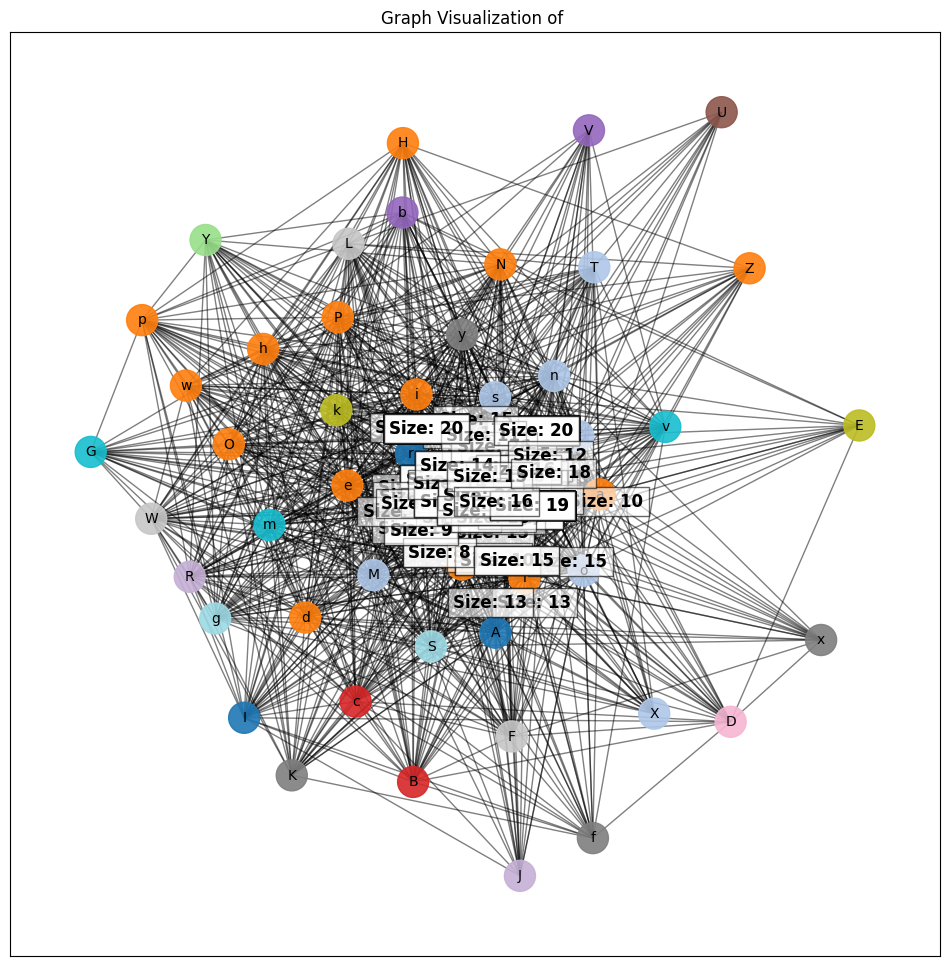

61 False
(61, False)


In [116]:
print(find_and_extract_communities(G,"Manhattan, KS","Ames, IA",communities_list))

**Alternative algorithm label propagation**

In [126]:
from collections import Counter
def custom_label_propagation(G, min_community_size=110, max_iterations=400):

    # Initialize each node with a unique label
    labels = {node: node for node in G.nodes()}
    iteration = 0
    converged = False

    while not converged and iteration < max_iterations:
        converged = True
        nodes = list(G.nodes())
        np.random.shuffle(nodes)

        for node in nodes:
            # Collect labels of neighbors
            neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]
            if neighbor_labels:
                # Update label to the most common neighbor label
                most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
                if labels[node] != most_common_label:
                    labels[node] = most_common_label
                    converged = False

        # Ensure minimum community size constraint
        label_counts = Counter(labels.values())
        for node in labels:
            if label_counts[labels[node]] < min_community_size:
                # Reassign to a larger community
                neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]
                if neighbor_labels:
                    labels[node] = Counter(neighbor_labels).most_common(1)[0][0]

        iteration += 1

    # Group nodes into communities based on labels
    communities = {}
    for node, label in labels.items():
        communities.setdefault(label, []).append(node)

    return list(communities.values())

def plot_communities(graph, communities, title):

    color_map = {}
    for i, community in enumerate(communities):
        for node in community:
            color_map[node] = i
    colors = [color_map[node] for node in graph.nodes()]
    nx.draw(graph, node_color=colors, with_labels=True, cmap=plt.cm.rainbow)
    plt.title(title)
    plt.show()

In [127]:
from cdlib import NodeClustering
communities_list=custom_label_propagation(G)


# Now use communities_list in NodeClustering
community_structure = NodeClustering(communities=communities_list, graph=G, method_name="Custom")
#community_structure = NodeClustering(communities=communities, graph=G, method_name="Custom")

# Calculate modularity
modularity_score = community_structure.newman_girvan_modularity().score

# Display the modularity score
print("Modularity score:", modularity_score)


Modularity score: -0.4954670337185211


The custom **label propagation algorithm** outperforms the Louvain algorithm in terms of computational performance, typically being faster and more efficient when handling large-scale networks. This efficiency makes it a compelling choice in scenarios where quick execution is crucial, such as real-time analysis or iterative updates in dynamic graphs. However, despite its performance benefits, the modularity score achieved by the custom label propagation algorithm is generally lower than that of the Louvain algorithm.

This lower modularity score indicates that the quality of the detected communities—based on the strength of connections within communities relative to connections between them—is somewhat inferior compared to the results of the Louvain method. The Louvain algorithm is known for its robust modularity optimization, which often yields communities that are more cohesive and better defined, albeit at the cost of higher computational demand.

In summary, while the custom label **propagation algorithm** is advantageous for speed and scalability, it may compromise the quality of community detection as measured by modularity. The choice between the two algorithms depends on the specific requirements of the task, such as whether computational efficiency or community quality is the primary objective.